## Likelihood of a new patient having heart disease

We are working for an R&D company that focuses on providing healthcare solutions. The company has collected anonymized data from multiple hospitals on several patients. The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

We are tasked with using the dataset to accurately predict the likelihood of a new patient having heart disease in the future.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [5]:
df=pd.read_csv("heart_disease_prediction.csv")

In [6]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.shape

(918, 12)

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

The average age of the patients is 53,51. There are some values that they doesn't look right. THe first one is Resting BP where the minimum value is 0. Cholesterol has a minimum of 0 and the median is higher than its mean by roughly 25 mm/dl. There aren't missing values. 

In [10]:
df_categorical=df[["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]]   

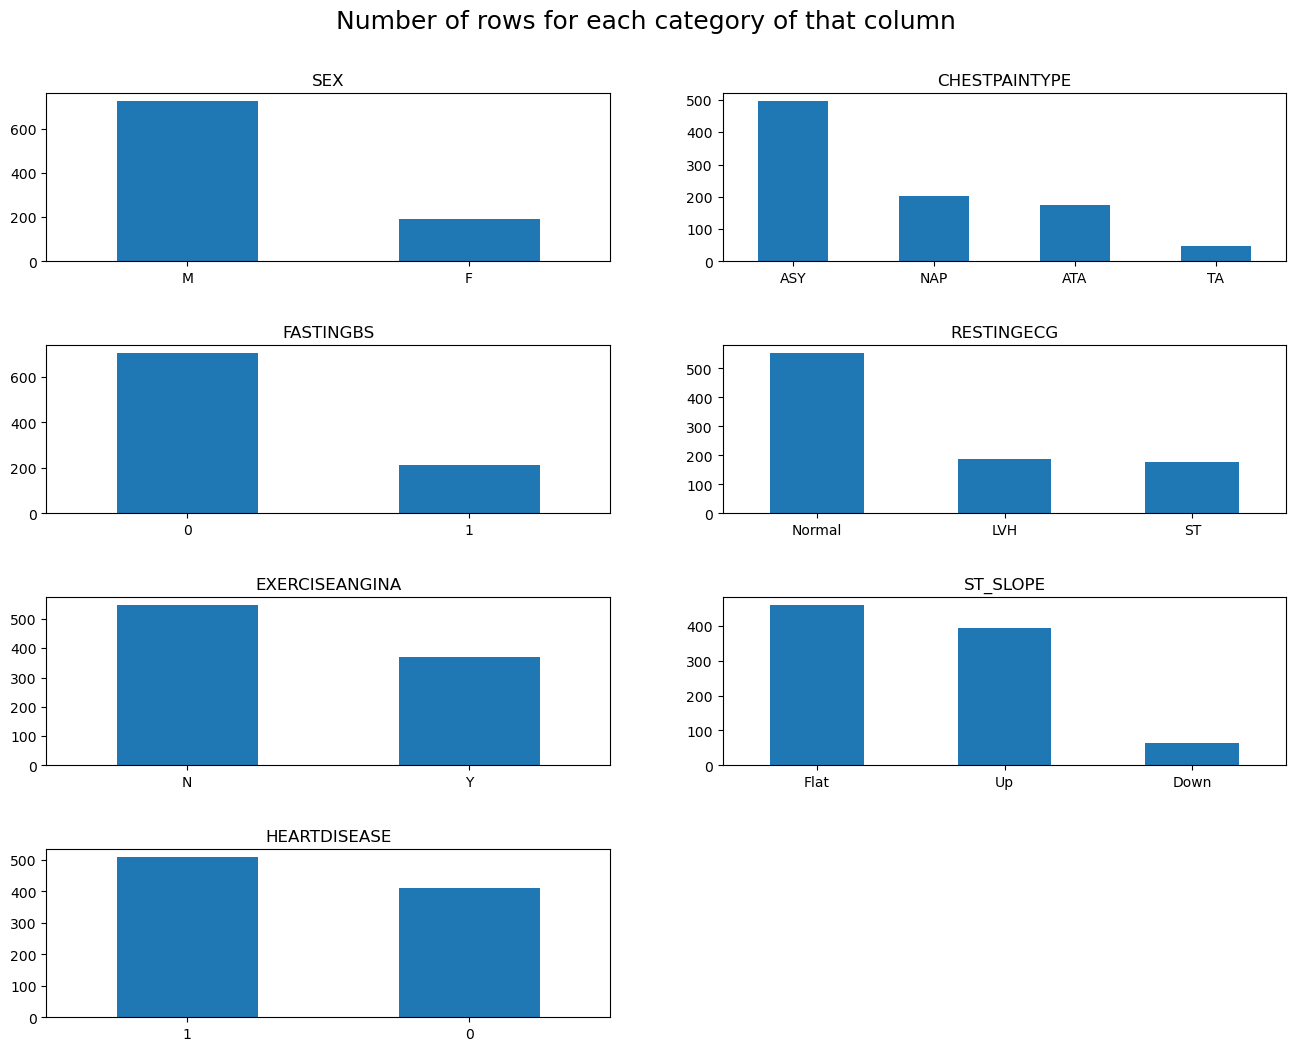

In [11]:
plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Number of rows for each category of that column", fontsize=18, y=0.95)
for i, value in enumerate(df_categorical):
    ax= plt.subplot(4,2, i+1)
    df_categorical[value].value_counts().plot.bar(ax=ax)
    ax.tick_params(labelrotation=0)
    ax.set_title(value.upper())

There are more male patients than female ones. The number of people with heart disease is higher than people withouth them.

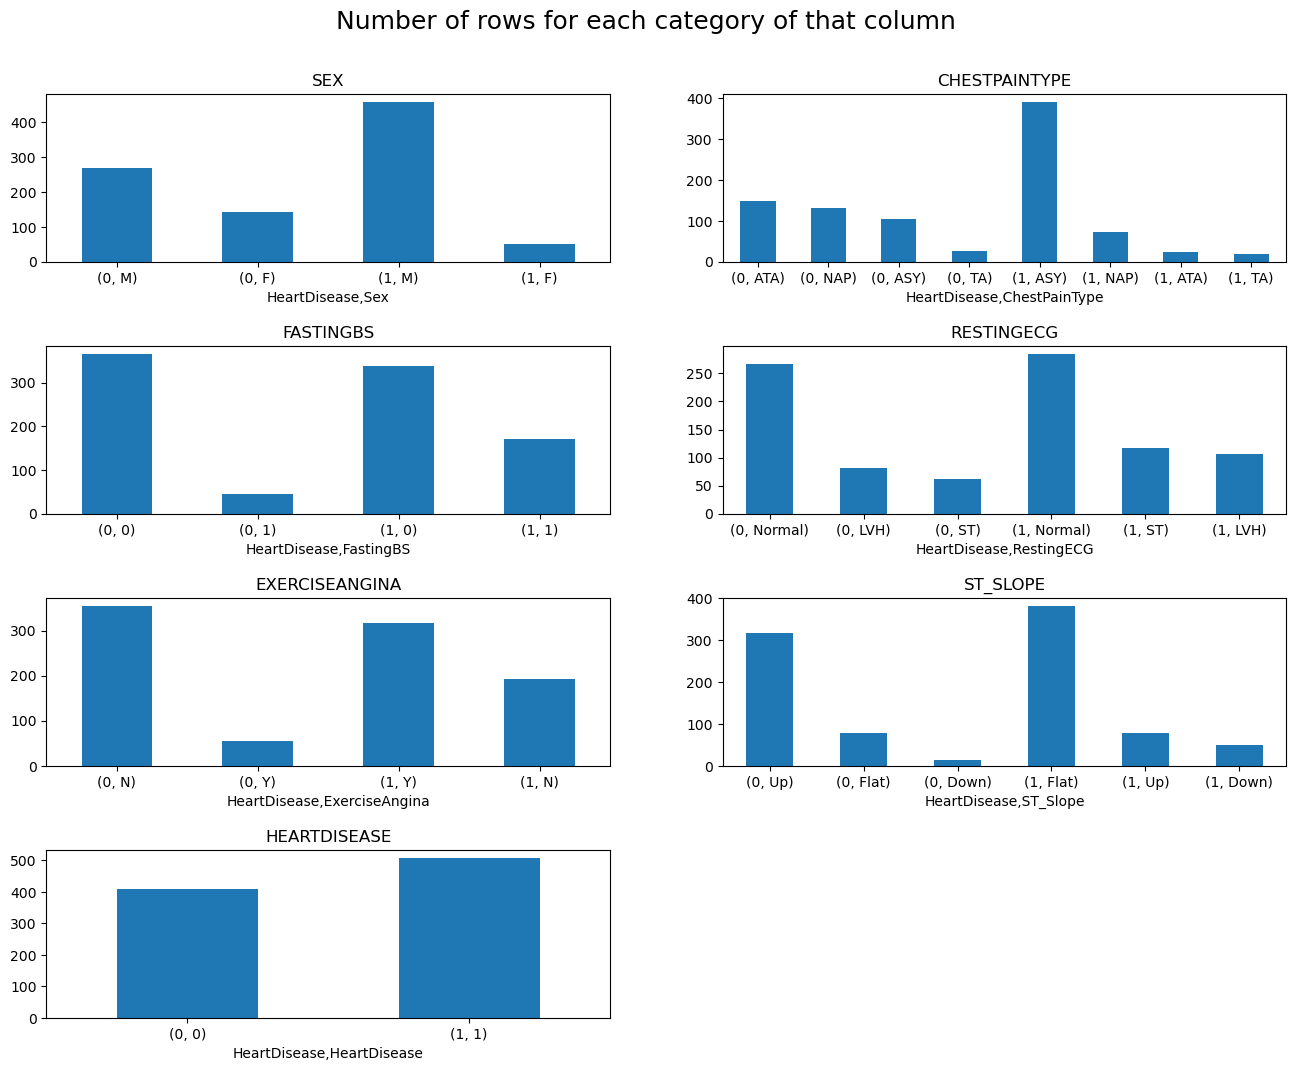

In [12]:
plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Number of rows for each category of that column", fontsize=18, y=0.95)
for i, value in enumerate(df_categorical):
    ax= plt.subplot(4,2, i+1)
    df_categorical.groupby("HeartDisease")[value].value_counts().plot.bar(ax=ax)
    ax.tick_params(labelrotation=0)
    ax.set_title(value.upper())

The category with the highest count is the ASY for people with a heartdisease, this for the category ChestPainType. Also, it's interesting to underline that males with heartdisease are the majority, nearly doubling the second highest (males with no heart disease).

In [13]:
male_over50=df[(df["HeartDisease"]==1) & (df["Age"]>50) & (df["Sex"]=="M")]

In [14]:
male_over50

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
18,60,M,ASY,100,248,0,Normal,125,N,1.0,Flat,1
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
32,54,M,ASY,125,224,0,Normal,122,N,2.0,Flat,1
36,65,M,ASY,140,306,1,Normal,87,Y,1.5,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
905,67,M,NAP,152,212,0,LVH,150,N,0.8,Flat,1
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1


In [15]:
male_over50_perc=round((male_over50.shape[0]/df.shape[0])*100,2)

In [16]:
male_over50_perc

37.47

In [17]:
df.groupby("HeartDisease")["Age"].median()

HeartDisease
0    51.0
1    57.0
Name: Age, dtype: float64

Above, it was calculeted the percentage of patients with heart disease are male and over 50 years old and  the median age of patients who were diagnosed with heart disease.

In [18]:
null_resting=df[df["RestingBP"]==0]

In [19]:
null_resting

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [20]:
null_col=df[df["Cholesterol"]==0]
null_col_0=null_col[null_col["HeartDisease"]==0]

In [21]:
null_col.shape[0]

172

In [22]:
df.groupby("HeartDisease")["RestingBP"].median()

HeartDisease
0    130.0
1    132.0
Name: RestingBP, dtype: float64

In [23]:
df.loc[449,"RestingBP"]=[132]

In [24]:
df.groupby("HeartDisease")["Cholesterol"].median()

HeartDisease
0    227.0
1    217.0
Name: Cholesterol, dtype: float64

In [25]:
df.loc[(df["Cholesterol"]==0) & (df["HeartDisease"]==0), "Cholesterol"]=227
df.loc[(df["Cholesterol"]==0) & (df["HeartDisease"]==1), "Cholesterol"]=217


In [26]:
df=pd.get_dummies(df, columns=["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"], drop_first=True)

In [27]:
df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,1,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,0,1,1,0,0,0,0,1,0,0,1
3,48,138,214,108,1.5,1,0,0,0,0,0,1,0,1,1,0
4,54,150,195,122,0.0,0,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,1,1,0,0,1,0,1,0,0,1,0
914,68,144,193,141,3.4,1,1,0,0,0,1,1,0,0,1,0
915,57,130,131,115,1.2,1,1,0,0,0,0,1,0,1,1,0
916,57,130,236,174,0.0,1,0,1,0,0,0,0,0,0,1,0


<AxesSubplot:>

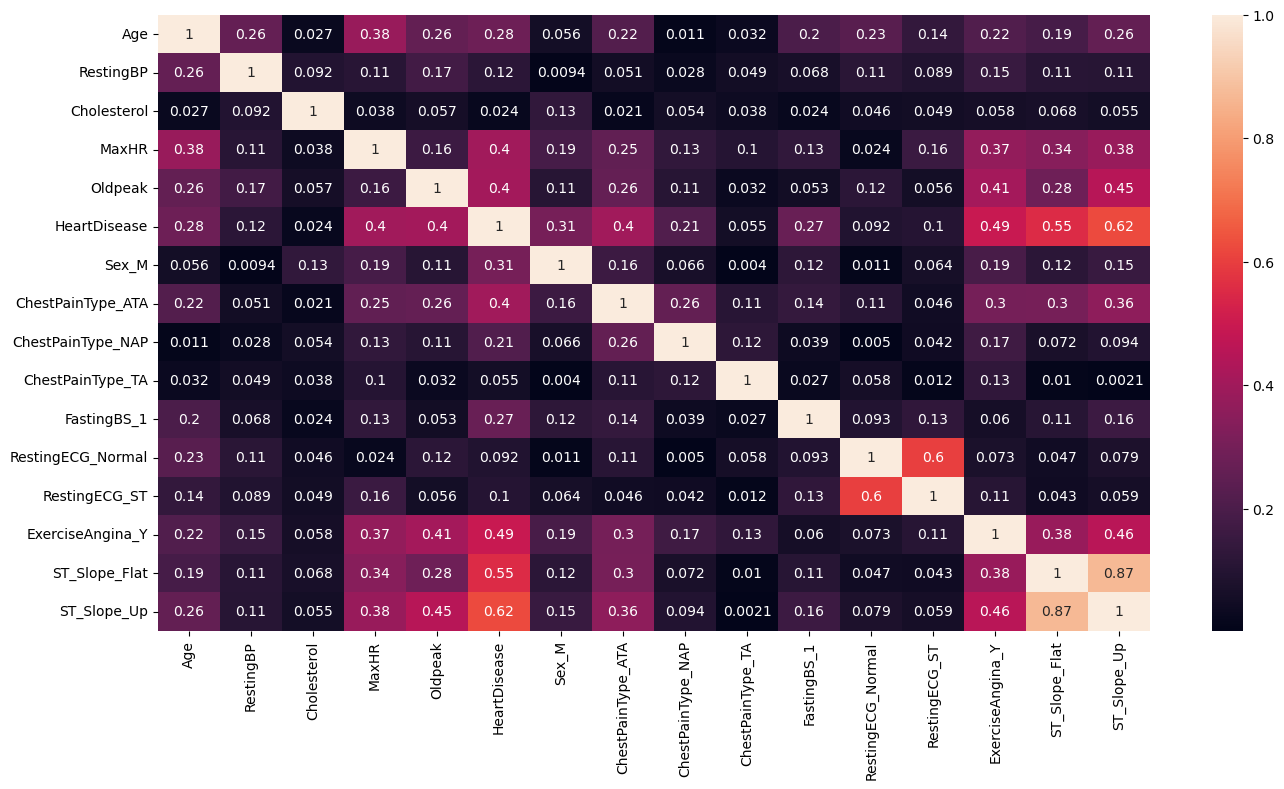

In [28]:
df_corr=abs(df.corr())
plt.figure(figsize=(16,8))
sns.heatmap(df_corr, annot=True)

In [29]:
df.corr()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.263076,0.026681,-0.382045,0.258612,0.282039,0.055750,-0.218165,-0.011335,0.032042,0.198039,-0.230566,0.136798,0.215793,0.185568,-0.258067
RestingBP,0.263076,1.000000,0.092174,-0.109686,0.174201,0.117909,0.009408,-0.051352,-0.027545,0.049470,0.067830,-0.113744,0.089161,0.153034,0.110078,-0.105897
Cholesterol,0.026681,0.092174,1.000000,0.037620,0.056808,0.024491,-0.132471,0.021143,-0.053953,-0.038167,-0.023654,-0.046497,-0.049030,0.058479,0.067501,-0.055178
MaxHR,-0.382045,-0.109686,0.037620,1.000000,-0.160691,-0.400421,-0.189186,0.253735,0.134580,0.100025,-0.131438,0.023801,-0.157879,-0.370425,-0.342581,0.383397
Oldpeak,0.258612,0.174201,0.056808,-0.160691,1.000000,0.403951,0.105734,-0.262124,-0.106212,0.032231,0.052698,-0.116719,0.055958,0.408752,0.283295,-0.450577
HeartDisease,0.282039,0.117909,0.024491,-0.400421,0.403951,1.000000,0.305445,-0.401924,-0.212964,-0.054790,0.267291,-0.091580,0.102527,0.494282,0.554134,-0.622164
Sex_M,0.055750,0.009408,-0.132471,-0.189186,0.105734,0.305445,1.000000,-0.161522,-0.066486,-0.004031,0.120076,-0.010634,0.063715,0.190664,0.116077,-0.150942
ChestPainType_ATA,-0.218165,-0.051352,0.021143,0.253735,-0.262124,-0.401924,-0.161522,1.000000,-0.256767,-0.110679,-0.140514,0.107941,-0.046111,-0.300365,-0.304667,0.357588
ChestPainType_NAP,-0.011335,-0.027545,-0.053953,0.134580,-0.106212,-0.212964,-0.066486,-0.256767,1.000000,-0.122381,-0.039249,0.005010,-0.042236,-0.166030,-0.072031,0.093583
ChestPainType_TA,0.032042,0.049470,-0.038167,0.100025,0.032231,-0.054790,-0.004031,-0.110679,-0.122381,1.000000,0.026885,-0.057719,-0.011611,-0.128105,-0.010486,0.002087


In [30]:
X=df[["Oldpeak", "Sex_M", "ExerciseAngina_Y", "ST_Slope_Flat", "ST_Slope_Up"]]
y=df["HeartDisease"]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=1)

In [31]:
lista=["Oldpeak", "Sex_M", "ExerciseAngina_Y", "ST_Slope_Flat", "ST_Slope_Up"]

In [32]:
for i in lista:
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train[[i]], y_train)
    print("The accurancy score for the {} feature is: {}".format(i,knn.score(X_test[[i]], y_test)))

The accurancy score for the Oldpeak feature is: 0.7934782608695652
The accurancy score for the Sex_M feature is: 0.6847826086956522
The accurancy score for the ExerciseAngina_Y feature is: 0.7554347826086957
The accurancy score for the ST_Slope_Flat feature is: 0.7880434782608695
The accurancy score for the ST_Slope_Up feature is: 0.8858695652173914


The best model for the selected features is the ST_Slope_Up feature with a score of 0.8858. THe lowest value is the Sex_M with a value of 0.68

In [33]:
scaler=MinMaxScaler()

In [34]:
scaled_x_train=scaler.fit_transform(X_train)
scaled_x_test=scaler.transform(X_test[["Oldpeak", "Sex_M", "ExerciseAngina_Y", "ST_Slope_Flat", "ST_Slope_Up"]])

In [35]:
knn_scaled=KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(scaled_x_train, y_train)
print("The accurancy score is: {}".format(knn_scaled.score(scaled_x_test, y_test)))

The accurancy score is: 0.8641304347826086


The score is slighty higher than the average of the single features taken in account. Even though, it's less than the ST_Slope_Up that we have seen before.

In [36]:
grid_params={"n_neighbors": range(1,10), "metric": ["minkowski","manhattan"]}

In [38]:
knn=KNeighborsClassifier()
gv= GridSearchCV(knn, grid_params, scoring="accuracy")
gv.fit(scaled_x_train, y_train)
print(gv.best_score_)
print(gv.best_params_)

0.825608051439754
{'metric': 'minkowski', 'n_neighbors': 5}


With the grid search the value is slighty lower than before. The best metric is the "minkowski" ones and the best number of neighbors is 5. 

In [39]:
accuracy=gv.best_estimator_.score(scaled_x_test, y_test)
print(accuracy)

0.8641304347826086


The accuracy is higher in the test set because the male part in the training set is over represented despite the proportion in the test set. The difference between the male and fem